# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data.
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various android applications and their corresponding ratings. Further information about the dataset can be found [here](https://huggingface.co/datasets/sealuzh/app_reviews).


## Task 1: Data Exploration





1. Load the dataset from the file "app_review.csv". How many records does the dataset contain? How many distinct classes are there in the dataset? Randomly select and print 5 reviews with a rating of '1' and 5 reviews with a rating of '5'.

In [90]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [91]:
# Load the dataset
app_review = pd.read_csv("app_review.csv")

In [92]:
# How many records in the dataset?
app_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57613 entries, 0 to 57612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  57608 non-null  object
 1   Rating  57613 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 900.3+ KB


The table above shows that the total number of records in the dataset are 57,613. However, this is the total number of rows for the whole dataset, as the review column has less at 57,608, showing future data quality issues that could be cleaned.

In [93]:
# How many distinct classes are in the dataset?
distinct_classes = app_review["Rating"].nunique()

print(f"There are {distinct_classes} distinct classes in the Rating column.")

There are 5 distinct classes in the Rating column.


In [94]:
# Sample reviews with a rating of 1
rated_reviews_1 = app_review[app_review['Rating'] == 1]

rated_reviews_1.sample(n=5)

,Review,Rating
5174,Didn't even work stupid app#delete Not working,1
6208,Bakwas,1
2708,Worthless the peice of junk doesn't work after...,1
2776,Poo!,1
6975,you sucker No,1


In [95]:
# Sample reviews with a rating of 5
rated_reviews_5 = app_review[app_review['Rating'] == 5]

rated_reviews_5.sample(n=5)

,Review,Rating
47922,Galaxy S5 Comes in handy when on the go!,5
39532,All the best Yes,5
25709,Is good,5
30364,Good Love it,5
42433,Good,5


2. Is the class distribution balanced? To support your answer, create a bar plot with the classes on the x-axis and the number of reviews in each class on the y-axis. Additionally, based on your observations of the reviews and the class distribution, determine whether there are more positive or negative reviews.

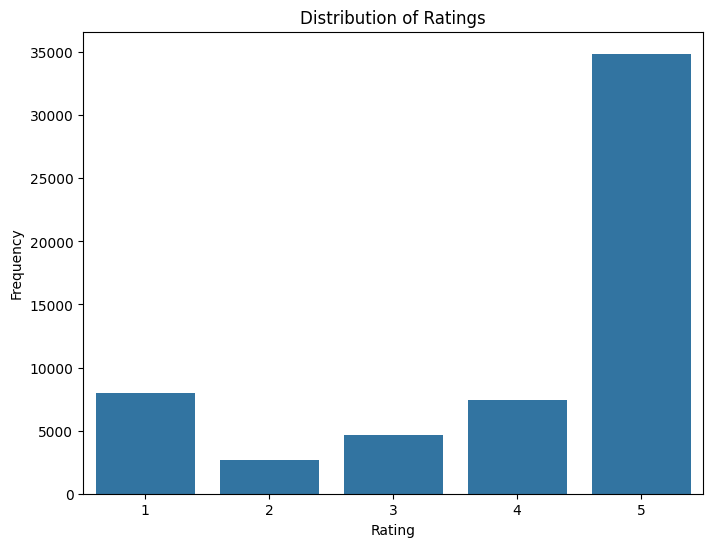

In [96]:
rating_counts = app_review['Rating'].value_counts()

# Creating the bar chart
plt.figure(figsize=(8,6))
sns.countplot(x="Rating", data=app_review)

# Labels and Titles
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Show plot
plt.show()


From the bar chart shown above, the class distribution is not balanced. This is due to the large number of 5 point reviews, which is significantly higher than the other ratings.

<br>

This shows that it can be assumed the overall review of the app is highly positive. This can be better observed and described through the code below that calculates and shows the number of positive, negative nd neutral reviews of the app.

In [97]:
print(rating_counts, "\n\n")

# Assuming a rating > 3 is positive < 3 is negative and 3 is neutral.
print(f"The number of positive ratings is: {rating_counts.loc[4] + rating_counts.loc[5]}", "\n")
print(f"The number of negative ratings is: {rating_counts.loc[1] + rating_counts.loc[2]}", "\n")
print(f"The number of neutral ratings is: {rating_counts.loc[3]}", "\n")

Rating
5    34875
1     7997
4     7449
3     4639
2     2653
Name: count, dtype: int64 


The number of positive ratings is: 42324 

The number of negative ratings is: 10650 

The number of neutral ratings is: 4639 



This once again demonstrates that the overall distrubution of reviews is highly positive, with 42,324 reviews with a rating of 4 or 5.

## Task 2: Data Preprocessing

- Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.



In [98]:
import re

def clean_data(text):

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)

    return text

In [99]:
# Provide your answers here
app_review["Review"] = app_review["Review"].astype(str)
X = app_review["Review"].apply(clean_data)

- Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

# define X and y
X = app_review["Review"]
y = app_review["Rating"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)


- Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
import nltk


nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4882158/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4882158/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4882158/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
# Provide your answers here

# define stop words
stop_words = stopwords.words('english')

# define CountVectorizer object
vectorizer = CountVectorizer(stop_words=stop_words, min_df=0.01)


# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
train_data_BOW = vectorizer.transform(X_train)

# create BOW for test data
test_data_BOW = vectorizer.transform(X_test)


## Task 3: Model Training

Define 2 Logistic Regression models: *model1* and *model2* and train the models as follows:
- Train the first Logistic Regression model to predict the application rating (Y).


In [110]:
from sklearn.linear_model import LogisticRegression

# Provide your answers here
model1 = LogisticRegression(random_state=random_state)

model1.fit(train_data_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF57BC5440)

- Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary.

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [105]:
import copy

In [106]:
# Provide your answers here
y_train_binary = copy.deepcopy(y_train)
y_test_binary = copy.deepcopy(y_test)

y_train_binary.loc[y_train_binary < 4] = -1
y_train_binary.loc[y_train_binary >= 4] = 1

- Train the second Logistic Regression model to predict the binary sentiment label (Y_binary).


In [107]:
# Provide your answers here
model2 = LogisticRegression(random_state=random_state)

model2.fit(train_data_BOW, y_train_binary)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF57BC5440)


- Make and store predictions for both models

In [108]:
# Provide your answers here

# Make predictions
model1_pred = model1.predict(test_data_BOW)
model2_pred = model2.predict(test_data_BOW)

# Store the predictions
model1_results = pd.DataFrame({
    'Review': X_test,  # Original reviews
    'True Rating': y_test,  # True ratings
    'Predicted Rating': model1_pred  # Predicted ratings
})

model1_results.to_csv("model1_predictions.csv", index=False)

model2_results = pd.DataFrame({
    'Review': X_test,  # Original reviews
    'True Rating': y_test,  # True ratings
    'Predicted Rating': model2_pred  # Predicted ratings
})

model2_results.to_csv("model2_predictions.csv", index=False)


## Task 4: Model Evaluation

- Compute and compare the test accuracy of Model 1 and Model 2. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Provide your answers here

# Model 1
print(f"--- Model 1 ---")

model1_accuracy = accuracy_score(y_test, model1_pred)
print(f"Accuracy: {model1_accuracy}")

# Model 2
print(f"\n--- Model 2 ---")

model2_accuracy = accuracy_score(y_test, model2_pred)
print(f"Accuracy: {model2_accuracy}")



--- Model 1 ---
Accuracy: 0.6414603101133997

--- Model 2 ---
Accuracy: 0.083371904651701


Based on the results shown above, Model 1 has performed better with the multi-class rating precision model than Model 2's binary sentiment prediction. 

The higher accuracy of 64% compared to 8% means Model 1 does better at distinguishing between subtleties of what text is associated with the ratings of 1 to 5. This is theorised to be due to having more options for classification. As there is a 'neutral' rating where it is neither positive or negative, as well as having the option to classify text that is on the boundary of either positive or negative, the model has an easier time predicting the ratings.

Compared to Model 2's binary sentiment prediction, which only distinguishes between two polar opposite states appears to lose meaning and understanding within the ratings. This could be due to the generic nature of the english language and possibly the subtle differences in what a 'neutral' rating is, which could be close to or bordering on negative or positive.



- For Model 1,  compute additional evaluaton measures, namely confusion matrix, precision and recall.  

Classification Report:
----------------------
              precision    recall  f1-score   support

           1       0.50      0.34      0.40      2386
           2       0.31      0.01      0.03       799
           3       0.31      0.05      0.08      1392
           4       0.39      0.05      0.09      2219
           5       0.67      0.96      0.79     10488

    accuracy                           0.64     17284
   macro avg       0.43      0.28      0.28     17284
weighted avg       0.56      0.64      0.55     17284



Text(0.5, 1.0, "Model 1's Confusion Matrix")

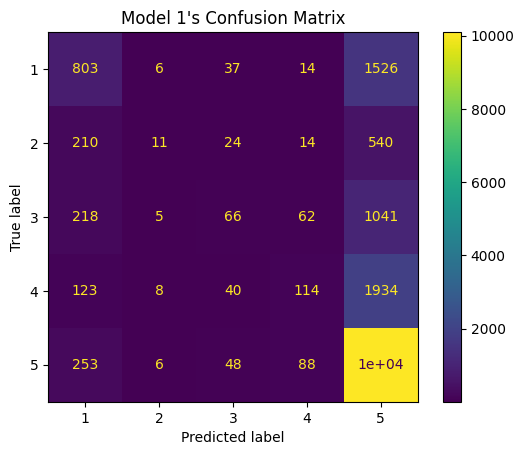

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Provide your answers here
# For Model 1
report = classification_report(y_test, model1_pred)
print(f"Classification Report:\n----------------------")
print(f"{report}")

matrix = confusion_matrix(y_test, model1_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels = model1.classes_)
display.plot()
plt.title("Model 1's Confusion Matrix")

- Based on the confusion matrix obtained in the previous question (referring to Model 1, the Logistic Regression for rating prediction), identify and state the number of samples that were classified to have the rating of 1 (the lowest rating), but in reality, they had an actual rating of 5 (the highest rating).

Based on the confusion matrix for model 1 above, the number of samples that were predicted to have a rating of 1 but had an actual rating of 5 is 253.



## Task 5: Model Analysis



- Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 1.

As explored previously in this Jupyter Notebook the class distribution with the actual/true ratings can be graphically seen.

This distribution graph showed a large number of of actual 5 rating scores. Which accounted for 60% of the overall app review data. This means that if our model was trained or built to where it predicted every rating to be a 5, it would be correct 60% of the time. Or have an accuracy of 60%. From the classification report, the f1-score for accuracy was 0.64.

0.64 or 64% score is very similar to the accuracy score that would be achived if the model only predicted ratings of 5. Therefore, making the evaluation measure of accuracy as it under-represents the other classes of ratings 1 to 4.

Furthermore, with the model being trained on a higher number of 5 score ratings, the chance for the model to be overfit is more likely. So, given a test set with significantly less 5 score ratings model 1 could perform worse as it fits too closely to the given training data.


Following on from why the accuracy evaluation measure (in this case) is a poor evaluation measure, what is the most suitable evaluation metric? Aside from accuarcy, the model can be evaluated on precision, recall, and an f-score (a combination of precision and recall).

Precision measures how many of the reviews predicted as 5 rating score are actually a 5 rating score. This metric is effective for a model where the goal is to minimse the number of false positives, or the number of lower rated reviews that are predicted to be a 5 rating score.

Recall measures how mnay of the actual/true 5 rating score reviews were correctly identified. This metric is effective for a model if the goal is to maximise how many 5 rating scores are identified.

F1-Score is a combiation of precision and recall. This metric is effective when a model's goal is to balance precision and recall.

As previously expressed in this section. The data used to train the models is very imbalanced with a large number of 5 rating score reviews, and this can effect accuracy, precision, and recall. If the model predicts a 5 for everything, it'll have high precision due to a large number of 5 ratings in the data. Similarly for recall, it has the same effect on it's metric.

An argument for precision can be made when if false-positives are costly, i.e. if misclassifiying a review as a different class would have a significant impact, then precision would be the more suitable evaluation metric. 

However, ensuring that precision and recall is balanced means that model is identifying the rating scores accurately without missing too many of them. Which will also lead to a more realistic evaluation of the model's performance on minority classes in the data. Therefore, the most suitable evaluation metric for the model is F1-Score.


- For binary sentiment prediction (Model 2), visualize important words with their model coefficients.  

*Tip: you can reuse the function plot_coefficients from prac. session.*

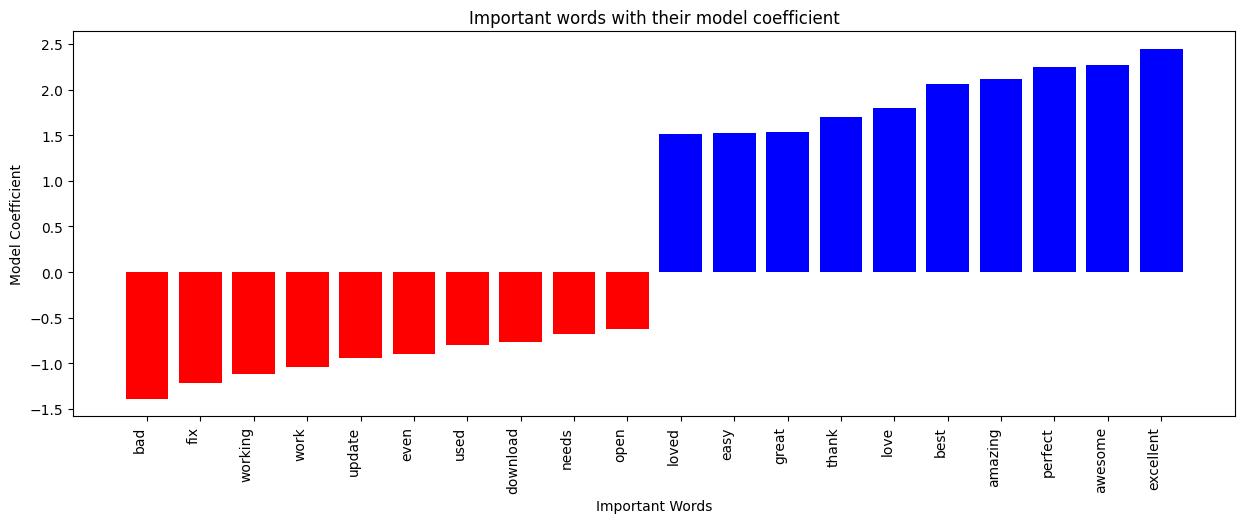

In [166]:
# Used from module 3 pracbook
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()


plot_coefficients(model2, vectorizer.get_feature_names_out())


- Analyze the quality of the features produced by Model 2 by examining the words with the highest coefficients for both the positive and negative classes.  Identify any potential bias in the model, and explain how this bias could affect its performance.

From the bar chart above, the categorisation of words is broken up into positive (blue) and negative (red) of the top ten for each. Potenial bais arrises in 3 main areas, common terms bias, imbalanced feature representation bias, and performance bias. 

With bias relating to assigning each individual word in the mode, the context in which the word has been used in has been lost. The word "working" can be taken out of context in two ways, "the app is working perfectly", or "the app is not working". This an example of a common term bias, as the word can be interpreted and used in either scenario of positive or negative. Further examples of this include: "even" and "update". Taken into a more positive context a possible review could be,"This app even has more functionality than my usual", or "The update fixed all the issues from before". As the model is trained to signal words with an associated to a negative or positive class, bais can come from losing contextual meaning and from intepreting common words incorrectly.

Following on from the idea of common term and contextual bias, imbalanced feature representation is a similar form of bias identified. This comes from certain common terms being easily interpreted and classified for the respective class. Words like "bad" or "excellent" are examples of this positive or negative grouping. Terms that aren't easily identifiable or intermediate words should have coefficents closer to zero. This classification of terms would include words like: "download", "used", and "work". As simiarly explored previously, these are terms that could be used in either classification, and due to the model training have been identified more strongly in negative interpretations. Leading to the model struggling with what are deemed as neutral terms, causing bias in the model's predications.

The final potential for bias in the model stems from the overall performance of the model. As the model has the chance to introduce bias via misclassifying review, due to the oversimplication and reliance on the standout words for each classification. This would appear as the model interpreting a positive review as a negative review, and then creating an association between the words incorrectly, leading to a lower coefficient in the binary sentiment prediction and vice versa.

As the possibility that bias can exists from the analaysis of the coefficients plot, the bias can 